In [1]:
import matplotlib.pyplot as plt
import numpy as np

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


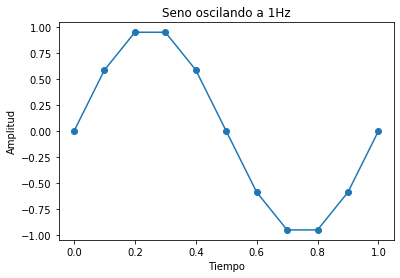

In [36]:
fig,ax = plt.subplots()

F = 1
x = np.arange(0,1.1,0.1)
y = np.sin(2*np.pi*F*x)
print(x)

ax.set_title("Seno oscilando a 1Hz")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Amplitud")
ax.plot(x,y,'o-')

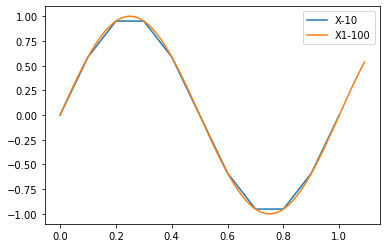

In [27]:
x1 = np.arange(0,1.1,0.01)
y1 = np.sin(2*np.pi*F*x1)

plt.plot(x,y,'-')
plt.plot(x1,y1,'-')
plt.legend(["X-10","X1-100"])



In [24]:
x1

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09])

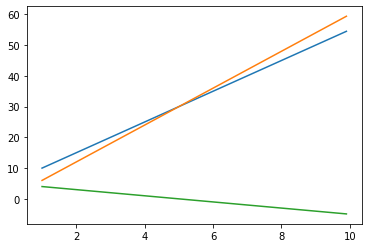

In [30]:



x = np.arange(1,10,0.1)
y = 5*x + 5
y1 = 6*x
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y - y1)


In [34]:
y-y1

array([ 4.00000000e+00,  3.90000000e+00,  3.80000000e+00,  3.70000000e+00,
        3.60000000e+00,  3.50000000e+00,  3.40000000e+00,  3.30000000e+00,
        3.20000000e+00,  3.10000000e+00,  3.00000000e+00,  2.90000000e+00,
        2.80000000e+00,  2.70000000e+00,  2.60000000e+00,  2.50000000e+00,
        2.40000000e+00,  2.30000000e+00,  2.20000000e+00,  2.10000000e+00,
        2.00000000e+00,  1.90000000e+00,  1.80000000e+00,  1.70000000e+00,
        1.60000000e+00,  1.50000000e+00,  1.40000000e+00,  1.30000000e+00,
        1.20000000e+00,  1.10000000e+00,  1.00000000e+00,  9.00000000e-01,
        8.00000000e-01,  7.00000000e-01,  6.00000000e-01,  5.00000000e-01,
        4.00000000e-01,  3.00000000e-01,  2.00000000e-01,  1.00000000e-01,
       -3.55271368e-15, -1.00000000e-01, -2.00000000e-01, -3.00000000e-01,
       -4.00000000e-01, -5.00000000e-01, -6.00000000e-01, -7.00000000e-01,
       -8.00000000e-01, -9.00000000e-01, -1.00000000e+00, -1.10000000e+00,
       -1.20000000e+00, -

In [37]:
from scipy.interpolate import interp1d

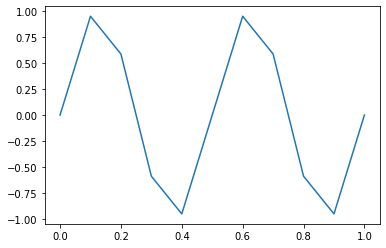

In [80]:
F = 2 # Hz
Fm = 10 # Cuantas muestras por segundo 

x = np.arange(0,1+(1/Fm),1/Fm)
y = np.sin(2*np.pi*F*x)
plt.plot(x,y,'-')

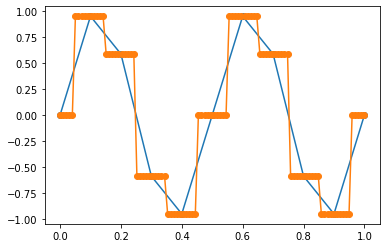

In [88]:
fn = interp1d(x, y, kind='nearest')
x_new = np.linspace(0,1, num=100)
y_inter = fn(x_new)
plt.plot(x,y,'-o')
plt.plot(x_new,y_inter,'-o')

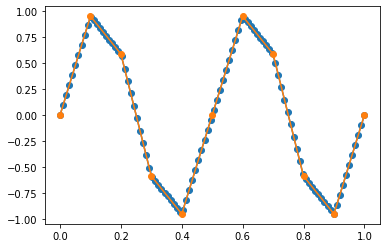

In [90]:
fn = interp1d(x, y, kind='linear')
x_new = np.linspace(0,1, num=100)
y_inter = fn(x_new)
plt.plot(x_new,y_inter,'-o')
plt.plot(x,y,'-o')


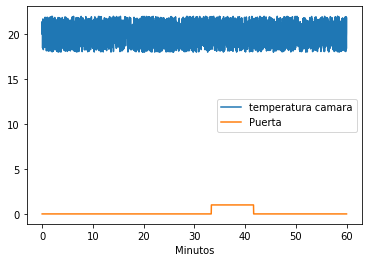

In [146]:
FM = 3600
x = np.linspace(0,60,num=FM)
# Sensor de temperatura en una habitacion que nos da valores entre 18C y 22C
T = np.random.random(FM)*4 + 18

# Sensor de una puerta que se abre si P vale 1
P = np.zeros(FM)
P[2000:2500] = 1

plt.figure()
plt.plot(x,T)
plt.plot(x,P)
plt.xlabel("Minutos")
plt.legend(["temperatura camara","Puerta"])

(60,) (60,)
Ha sonado la alarma en el minuto 33
Ha sonado la alarma en el minuto 37


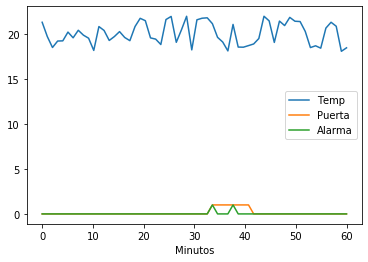

In [148]:
plt.figure()
fnP = interp1d(x, P, kind='nearest')
fnT = interp1d(x, T, kind='nearest')

FM2 = 60
xA = np.linspace(0,60,num=FM2)
PA = fnP(xA)
TA = fnT(xA)
print(PA.shape,TA.shape)

signals = [TA,PA]
for s in signals:
    plt.plot(xA,s)

yA = (TA > 20.5) & (PA == 1)
plt.plot(xA,yA)
plt.legend(["Temp","Puerta","Alarma"])
plt.xlabel("Minutos")

for i,e in enumerate(yA):
    if e == True:
        print(f"Ha sonado la alarma en el minuto {i}")

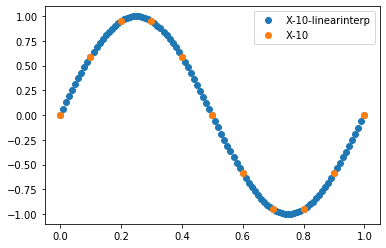

In [173]:
F = 1

# A
x = np.arange(0,1.1,0.1)
y = np.sin(2*np.pi*F*x)

# B
x1 = np.arange(0,1+0.01,0.01)
y1 = np.sin(2*np.pi*F*x1)

# C
cX = x1
cY = interp1d(x,y,kind="cubic")(x1)

plt.plot(cX,cY,'o')
plt.plot(x,y,'o')

plt.legend(["X-10-linearinterp","X-10"])


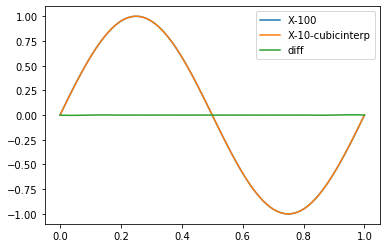

In [174]:
plt.plot(cX,cY,'-')
plt.plot(x1,y1,'-')
plt.plot(x1,y1-cY,'-')
plt.legend(["X-100","X-10-cubicinterp","diff"])